In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from helpers import upsample_train, plot_roc_curve

In [47]:
raw_data = pd.read_excel('data/existing-customers.xlsx')

/Users/jniedziela/.pyenv/versions/3.10.0/envs/DM/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [48]:
train = raw_data.copy()

target_col = 'class'
cols_to_drop = ['RowID', 'education']
categorical_cols = ['marital-status', 'relationship', 'race', 'sex', 'native-country', 'occupation', 'workclass']


# one of the beauties of catboost is that it does not require us to deal with missing values or preprocess categorical variables
train = train.drop(cols_to_drop, axis=1)

# As there is big difference in number of examples for each class, here I 
# upsamle the data, so that the number of examples for each class is the same
# I chose the upsampling as thanks to this we do not lose any information from dominant class

In [49]:
X = train.drop(target_col, axis=1)
y = train[target_col]

X[categorical_cols] = X[categorical_cols].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20224740, stratify=y)

In [33]:
model = CatBoostClassifier(
    loss_function='Logloss', 
    eval_metric='F1', 
    cat_features=categorical_cols, 
    verbose=False,
    auto_class_weights='SqrtBalanced'
    )

param_grid = {
    'learning_rate':np.arange(0, 0.6, 0.01),
    'depth':np.arange(6, 13),
    'iterations':np.arange(250, 1500, 100),
    'l2_leaf_reg' : np.arange(0, 20)
}

randomized_search_result1 = model.randomized_search(
    param_grid,
    X_train,
    y_train,
    n_iter=100,
    cv=5,
    partition_random_seed=20224740,
    stratified=True,
    train_size=0.66,
    verbose=True,
    plot=True
    )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7777087682
bestIteration = 648

0:	loss: 0.7777088	best: 0.7777088 (0)	total: 16.1s	remaining: 26m 37s

bestTest = 0.7800770256
bestIteration = 369

1:	loss: 0.7800770	best: 0.7800770 (1)	total: 34.7s	remaining: 28m 22s

bestTest = 0.7823149906
bestIteration = 611

2:	loss: 0.7823150	best: 0.7823150 (2)	total: 53.6s	remaining: 28m 51s

bestTest = 0.7787095578
bestIteration = 304

3:	loss: 0.7787096	best: 0.7823150 (2)	total: 1m 18s	remaining: 31m 20s

bestTest = 0.7804588979
bestIteration = 635

4:	loss: 0.7804589	best: 0.7823150 (2)	total: 1m 41s	remaining: 32m 2s

bestTest = 0.7809159475
bestIteration = 120

5:	loss: 0.7809159	best: 0.7823150 (2)	total: 2m 5s	remaining: 32m 50s

bestTest = 0.7770869972
bestIteration = 85

6:	loss: 0.7770870	best: 0.7823150 (2)	total: 2m 35s	remaining: 34m 22s

bestTest = 0.7764061275
bestIteration = 103

7:	loss: 0.7764061	best: 0.7823150 (2)	total: 3m 4s	remaining: 35m 19s

bestTest = 0.7783048303
bestIteration = 1265

8:	loss: 0.77830

Training has stopped (degenerate solution on iteration 8, probably too small l2-regularization, try to increase it)



bestTest = 0.7490907447
bestIteration = 4

99:	loss: 0.7490907	best: 0.7837855 (11)	total: 1h 3m 28s	remaining: 0us
Estimating final quality...
Training on fold [0/5]

bestTest = 0.7794152712
bestIteration = 70

Training on fold [1/5]

bestTest = 0.7837474098
bestIteration = 124

Training on fold [2/5]

bestTest = 0.7945891316
bestIteration = 235

Training on fold [3/5]

bestTest = 0.7863955734
bestIteration = 97

Training on fold [4/5]

bestTest = 0.7792962325
bestIteration = 327



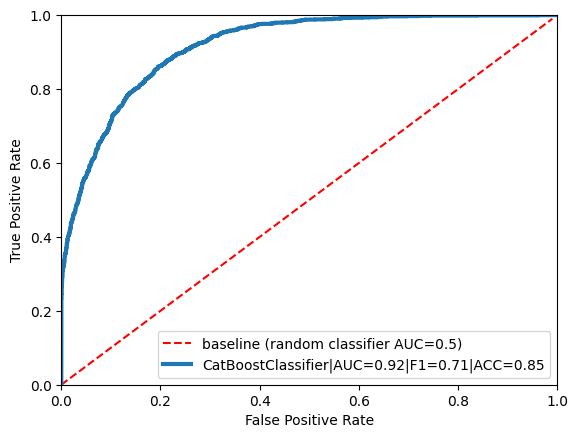

In [34]:
plot_roc_curve(model, X_test, y_test, '>50K')

In [35]:
model.save_model('catboost_model_v1.cbm')

In [58]:
model2 = CatBoostClassifier(
    loss_function='Logloss', 
    eval_metric='F1', 
    cat_features=categorical_cols, 
    verbose=False,
    auto_class_weights='Balanced'
    )

param_grid = {
    'learning_rate':np.arange(0, 0.6, 0.01),
    'depth':np.arange(6, 13),
    'iterations':np.arange(250, 1500, 100),
    'l2_leaf_reg' : np.arange(0, 20)
}

randomized_search_result2 = model2.randomized_search(
    param_grid,
    X_train,
    y_train,
    n_iter=100,
    cv=5,
    partition_random_seed=20224740,
    stratified=True,
    train_size=0.66,
    verbose=True,
    plot=True
    )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8475124257
bestIteration = 319

0:	loss: 0.8475124	best: 0.8475124 (0)	total: 17.6s	remaining: 29m 2s

bestTest = 0.8480985094
bestIteration = 442

1:	loss: 0.8480985	best: 0.8480985 (1)	total: 37.7s	remaining: 30m 45s

bestTest = 0.8471230681
bestIteration = 616

2:	loss: 0.8471231	best: 0.8480985 (1)	total: 57.3s	remaining: 30m 53s

bestTest = 0.8485446512
bestIteration = 118

3:	loss: 0.8485447	best: 0.8485447 (3)	total: 1m 22s	remaining: 33m 10s

bestTest = 0.8482226519
bestIteration = 282

4:	loss: 0.8482227	best: 0.8485447 (3)	total: 1m 48s	remaining: 34m 13s

bestTest = 0.8451479056
bestIteration = 52

5:	loss: 0.8451479	best: 0.8485447 (3)	total: 2m 15s	remaining: 35m 25s

bestTest = 0.8478356282
bestIteration = 54

6:	loss: 0.8478356	best: 0.8485447 (3)	total: 2m 48s	remaining: 37m 17s

bestTest = 0.8437246266
bestIteration = 135

7:	loss: 0.8437246	best: 0.8485447 (3)	total: 3m 20s	remaining: 38m 25s

bestTest = 0.8488576357
bestIteration = 1130

8:	loss: 0.8488

Training has stopped (degenerate solution on iteration 256, probably too small l2-regularization, try to increase it)



bestTest = 0.8301313533
bestIteration = 7

63:	loss: 0.8301314	best: 0.8491052 (9)	total: 28m 6s	remaining: 15m 48s

bestTest = 0.8411001217
bestIteration = 53

64:	loss: 0.8411001	best: 0.8491052 (9)	total: 28m 56s	remaining: 15m 35s

bestTest = 0.8412179958
bestIteration = 157

65:	loss: 0.8412180	best: 0.8491052 (9)	total: 29m 53s	remaining: 15m 24s

bestTest = 0.8409431809
bestIteration = 30

66:	loss: 0.8409432	best: 0.8491052 (9)	total: 30m 46s	remaining: 15m 9s

bestTest = 0.8474682265
bestIteration = 27

67:	loss: 0.8474682	best: 0.8491052 (9)	total: 31m 38s	remaining: 14m 53s

bestTest = 0.8386854474
bestIteration = 105

68:	loss: 0.8386854	best: 0.8491052 (9)	total: 32m 6s	remaining: 14m 25s

bestTest = 0.8442746313
bestIteration = 497

69:	loss: 0.8442746	best: 0.8491052 (9)	total: 32m 33s	remaining: 13m 57s

bestTest = 0.8360040567
bestIteration = 22

70:	loss: 0.8360041	best: 0.8491052 (9)	total: 33m 1s	remaining: 13m 29s

bestTest = 0.8430627203
bestIteration = 112

71:	

Training has stopped (degenerate solution on iteration 175, probably too small l2-regularization, try to increase it)



bestTest = 0.8225994381
bestIteration = 4

98:	loss: 0.8225994	best: 0.8491052 (9)	total: 56m 13s	remaining: 34.1s


Training has stopped (degenerate solution on iteration 11, probably too small l2-regularization, try to increase it)



bestTest = 0.8216783706
bestIteration = 2

99:	loss: 0.8216784	best: 0.8491052 (9)	total: 56m 13s	remaining: 0us
Estimating final quality...
Training on fold [0/5]

bestTest = 0.8452607965
bestIteration = 170

Training on fold [1/5]

bestTest = 0.8487154405
bestIteration = 124

Training on fold [2/5]

bestTest = 0.8474342331
bestIteration = 148

Training on fold [3/5]

bestTest = 0.8540655159
bestIteration = 164

Training on fold [4/5]

bestTest = 0.8502621743
bestIteration = 97



In [59]:
model2.save_model('catboost_models/catboost_model_v2.cbm')

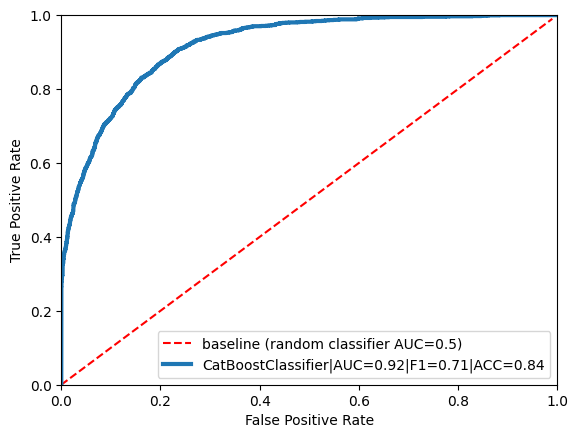

In [60]:
plot_roc_curve(model2, X_test, y_test, '>50K')

In [62]:
def workclass_reduce(val):
    if val == 'Without-pay' or val == 'Never-worked':
        return 'Not-employed'
    elif val == 'Local-gov' or val == 'State-gov':
        return 'Government'
    elif val == 'Self-emp-not-inc':
        return 'Private'
    else:
        return val
    
def education_reduce(val):
    if val in ['Bachelors', 'Some-college']:
        return 'Higher'
    elif val in ['Assoc-voc', 'Assoc-acdm']:
        return 'Associate'
    elif val in ['Doctorate', 'Prof-school', 'Masters']:
        return 'Post-grad'
    elif val in ['11th', '10th', '9th', '7th-8th', '12th', '5th-6th', '1st-4th', 'Preschool']:
        return 'School'
    else:
        return val
    
def marital_reduce(val):
    if val in ['Married-civ-spouse']:
        return 'Married'
    elif val in ['Married-spouse-absent', 'Married-AF-spouse', 'Divorced', 'Separated', 'Widowed']:
        return 'No-spouse'
    elif val in ['Never-married']:
        return 'Never-married'
    
def race_reduce(val):
    if val in ['Asian-Pac-Islander', 'Amer-Indian-Eskimo']:
        return 'Other'
    else:
        return val

train_processed = train.copy()

train_processed['education'] = raw_data['education'].apply(education_reduce)
train_processed.drop('education-num', axis=1, inplace=True)

train_processed['workclass'] = train_processed['workclass'].apply(workclass_reduce)
# train_processed['education'] = train_processed['education'].apply(education_reduce)
train_processed['marital-status'] = train_processed['marital-status'].apply(marital_reduce)
train_processed['race'] = train_processed['marital-status'].apply(race_reduce)

In [64]:
categorical_cols = [
    'marital-status', 
    'relationship', 
    'race', 
    'sex', 
    'native-country', 
    'occupation', 
    'workclass',
    'education'
    ]


X = train_processed.drop(target_col, axis=1)
y = train_processed[target_col]

X[categorical_cols] = X[categorical_cols].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20224740, stratify=y)




model3 = CatBoostClassifier(
    loss_function='Logloss', 
    eval_metric='F1', 
    cat_features=categorical_cols, 
    verbose=False,
    auto_class_weights='Balanced'
    )

param_grid = {
    'learning_rate':np.arange(0, 0.6, 0.01),
    'depth':np.arange(6, 13),
    'iterations':np.arange(250, 1500, 100),
    'l2_leaf_reg' : np.arange(0, 20)
}

randomized_search_result3 = model3.randomized_search(
    param_grid,
    X_train,
    y_train,
    n_iter=100,
    cv=5,
    partition_random_seed=20224740,
    stratified=True,
    train_size=0.66,
    verbose=True,
    plot=True
    )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8490539094
bestIteration = 407

0:	loss: 0.8490539	best: 0.8490539 (0)	total: 10.1s	remaining: 16m 44s

bestTest = 0.8482403112
bestIteration = 184

1:	loss: 0.8482403	best: 0.8490539 (0)	total: 23s	remaining: 18m 49s

bestTest = 0.847845769
bestIteration = 484

2:	loss: 0.8478458	best: 0.8490539 (0)	total: 34.1s	remaining: 18m 21s

bestTest = 0.8497791365
bestIteration = 143

3:	loss: 0.8497791	best: 0.8497791 (3)	total: 49.9s	remaining: 19m 57s

bestTest = 0.8506437859
bestIteration = 496

4:	loss: 0.8506438	best: 0.8506438 (4)	total: 1m 5s	remaining: 20m 50s

bestTest = 0.8477631324
bestIteration = 101

5:	loss: 0.8477631	best: 0.8506438 (4)	total: 1m 22s	remaining: 21m 35s

bestTest = 0.848895118
bestIteration = 50

6:	loss: 0.8488951	best: 0.8506438 (4)	total: 1m 57s	remaining: 26m

bestTest = 0.8459928477
bestIteration = 49

7:	loss: 0.8459928	best: 0.8506438 (4)	total: 2m 33s	remaining: 29m 28s

bestTest = 0.852613492
bestIteration = 818

8:	loss: 0.8526135	best: 0

Training has stopped (degenerate solution on iteration 117, probably too small l2-regularization, try to increase it)



bestTest = 0.8317610023
bestIteration = 14

63:	loss: 0.8317610	best: 0.8526135 (8)	total: 26m 57s	remaining: 15m 9s

bestTest = 0.8424501289
bestIteration = 53

64:	loss: 0.8424501	best: 0.8526135 (8)	total: 27m 31s	remaining: 14m 49s

bestTest = 0.8455451675
bestIteration = 124

65:	loss: 0.8455452	best: 0.8526135 (8)	total: 28m 16s	remaining: 14m 34s

bestTest = 0.8415813386
bestIteration = 18

66:	loss: 0.8415813	best: 0.8526135 (8)	total: 28m 53s	remaining: 14m 13s

bestTest = 0.8414661275
bestIteration = 33

67:	loss: 0.8414661	best: 0.8526135 (8)	total: 29m 27s	remaining: 13m 51s

bestTest = 0.8415849593
bestIteration = 168

68:	loss: 0.8415850	best: 0.8526135 (8)	total: 29m 47s	remaining: 13m 23s

bestTest = 0.8472748686
bestIteration = 464

69:	loss: 0.8472749	best: 0.8526135 (8)	total: 30m 5s	remaining: 12m 53s

bestTest = 0.8409088437
bestIteration = 24

70:	loss: 0.8409088	best: 0.8526135 (8)	total: 30m 25s	remaining: 12m 25s

bestTest = 0.8439417013
bestIteration = 130

7

Training has stopped (degenerate solution on iteration 19, probably too small l2-regularization, try to increase it)



bestTest = 0.8295208655
bestIteration = 7

98:	loss: 0.8295209	best: 0.8526135 (8)	total: 52m 3s	remaining: 31.5s


Training has stopped (degenerate solution on iteration 4, probably too small l2-regularization, try to increase it)



bestTest = 0.8270800713
bestIteration = 2

99:	loss: 0.8270801	best: 0.8526135 (8)	total: 52m 3s	remaining: 0us
Estimating final quality...
Training on fold [0/5]

bestTest = 0.8397671326
bestIteration = 886

Training on fold [1/5]

bestTest = 0.8464243102
bestIteration = 437

Training on fold [2/5]

bestTest = 0.8507350689
bestIteration = 629

Training on fold [3/5]

bestTest = 0.8498952721
bestIteration = 568

Training on fold [4/5]

bestTest = 0.855173042
bestIteration = 703



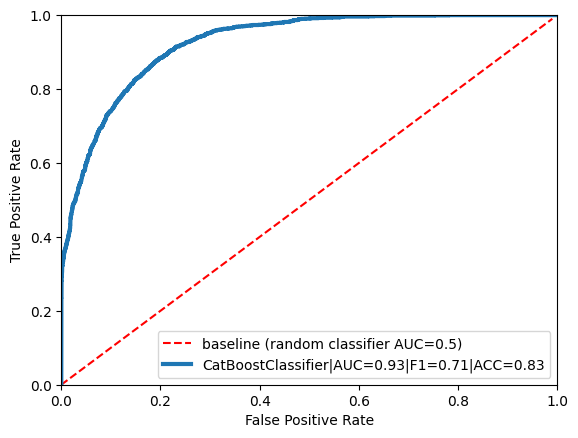

In [65]:
plot_roc_curve(model3, X_test, y_test, '>50K')

In [42]:
model3.save_model('catboost_models/catboost_model_v3.cbm')